In [416]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df



,Gender,Age,Head_Size_cm_cube_X,Brain_Weight_grams_Y
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [405]:
#Calculating B0 , B1 coefficients for Linear Regression

"""""
y = ax + b
a = B1
b = B0

"""""

meanx= meany=0
X = df.Head_Size_cm_cube_X
Y = df.Brain_Weight_grams_Y
N = len(df)

#Finding mean
for i in range(0 , len(df)):
    meanx = X[i] + meanx
    meany = Y[i] + meany
meanx = meanx / len(df)
meany = meany / len(df)

x1 = x2 = y1 = x1y1 = 0

for i in range(0,N):
    x1 = X[i] + x1
    x2 = (X[i]**2) + x2
    y1 = (Y[i]) + y1
    x1y1 = (X[i]*Y[i]) + x1y1

#Getting Coefficents via Cramers rule
A = np.array([[N,x1],[x1,x2]])
B = np.array([y1,x1y1])

Ainv = np.linalg.inv(A) 
[B0, B1 ] =  (np.dot(Ainv,B))
# Getting coefficents via least square method (Other way of solving)
# [B0, B1] =  np.linalg.lstsq(A,B)[0]

print("Coefficient Bo is ", B0)
print("Coefficient B1 is ", B1)
print("Mean of head size in cm^3 is ", meanx)
print("Mean of Brain weight in grams is ", meany)

Coefficient Bo is  325.5734210494411
Coefficient B1 is  0.2634293394893916
Mean of head size in cm^3 is  3633.9915611814345
Mean of Brain weight in grams is  1282.873417721519


In [406]:
import math

Xi = df.Head_Size_cm_cube_X
N = len(df)
varX = (sum((Xi - meanx)**2)) / (N - 1)

print("Variance of Head_Size_cm_cube_X is " ,varX)
SDx = math.sqrt(varX)
print("Standard Deviation of Head_Size_cm_cube_X is " ,SDx)

Yi = df.Brain_Weight_grams_Y
varY = (sum((Yi - meany)**2)) / (N - 1)


print("Variance of Brain_Weight_grams_Yis " ,varY)
SDy = math.sqrt(varY)
print("Standard Deviation of Brain_Weight_grams_Y is " ,SDy)

Variance of Head_Size_cm_cube_X is  133415.90670814549
Standard Deviation of Head_Size_cm_cube_X is  365.2614224198136
Variance of Brain_Weight_grams_Yis  14481.822892083253
Standard Deviation of Brain_Weight_grams_Y is  120.34044578645724


In [407]:
#Covariance - The measure of deviation from predicted values
CovarXY = (sum((Xi - meanx)*(Yi - meany))) / (N - 1)

print("Covariance w.r.t to Head_Size_cm_cube_X Brain_Weight_grams_Y is  " ,CovarXY)

Covariance w.r.t to Head_Size_cm_cube_X Brain_Weight_grams_Y is   35145.6641815061


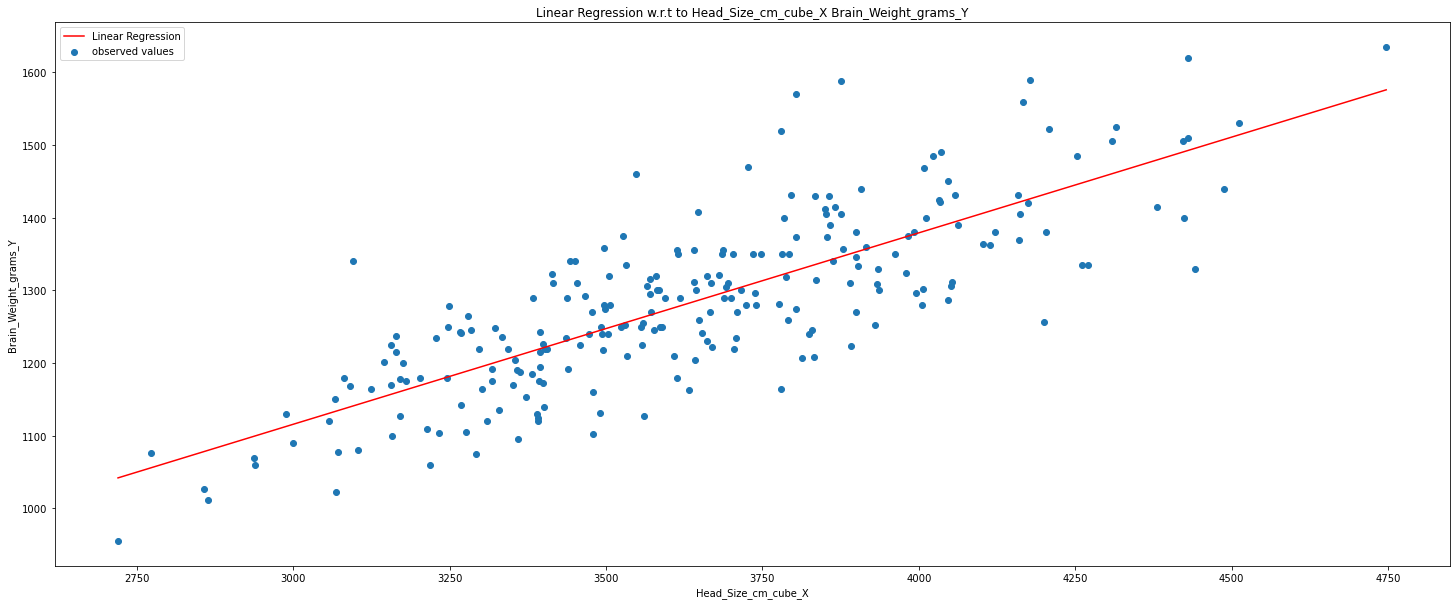

In [408]:
#Linear regression 
"""""
y = ax + b

As per the below plotted graph, 
x = X
y = Y
a = B1
b = B0

"""""

import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.scatter(X,Y ,label = 'observed values')
plt.xlabel("Head_Size_cm_cube_X")
plt.ylabel("Brain_Weight_grams_Y")
plt.title('Linear Regression w.r.t to Head_Size_cm_cube_X Brain_Weight_grams_Y')

x = np.array([min(X),max(X)])

y = lambda x: B1*x + B0

plt.plot(x,y(x) , label = "Linear Regression",c='red')
plt.legend()
plt.show()

In [409]:
#Q2 Finding Residuals 

df2 = pd.read_csv('DscLab_regression.csv')
X = df2.RoughWeight_X
Y = df2.FinishedWeight_Y
N = len(df2)

x1 = x2 = y1 = x1y1 = 0

for i in range(0,N):
    x1 = X[i] + x1
    x2 = (X[i]**2) + x2
    y1 = (Y[i]) + y1
    x1y1 = (X[i]*Y[i]) + x1y1

#Getting Coefficents via Cramers rule
A = np.array([[N,x1],[x1,x2]])
B = np.array([y1,x1y1])

Ainv = np.linalg.inv(A) 
[B0, B1 ] =  (np.dot(Ainv,B))
print('B1 value is ' , B1)
print('B0 value is ' , B0)

df2.head()

B1 value is  0.6487459359050263
B0 value is  0.2898159544765804


,Rod_no,RoughWeight_X,FinishedWeight_Y
0,1,2.745,2.080
1,2,2.700,2.045
2,3,2.690,2.050
3,4,2.680,2.005
4,5,2.675,2.035


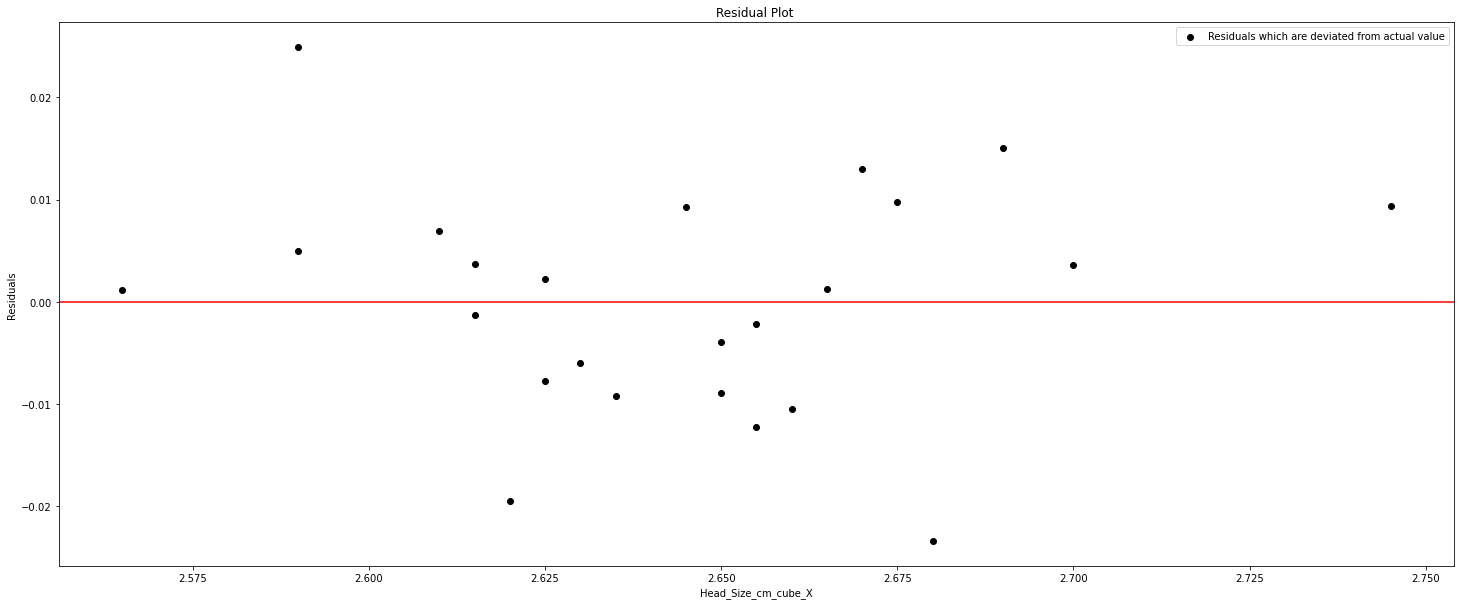

In [410]:
# Plotting Residuals in graph
plt.figure(figsize=(25,10))
X = df2.RoughWeight_X
Y = df2.FinishedWeight_Y
#plt.scatter(X,Y )
plt.xlabel("Head_Size_cm_cube_X")
plt.ylabel("Residuals")
plt.title('Residual Plot ')
x = np.array([min(X),max(X)])
#Find Residual 
y = lambda x: B1*x + B0 # small y is for predicted value from Linear regression
Ry = np.zeros(len(df2))
for i in range(0, len(Y)): 
    Ry[i] = Y[i] - y(X[i])  # Big Y is for Actual finished value 

# Ry is residuals (Actual value - predicted value) 
plt.scatter(X,Ry , label = "Residuals which are deviated from actual value",c='black')
plt.axhline( y =0 , color = 'r')
plt.legend()
plt.show()

In [411]:
#Calculalting coeffiencts for polynomial regression(degree 2) B0, B1, B2

"""""
y = ax^2 + bx + c
a = B2
b = B1
c = B0
"""""
df2 = pd.read_csv('DscLab_regression.csv')
X = df2.RoughWeight_X
Y = df2.FinishedWeight_Y
N = len(df2)

x1 = x2 = x3 = x4 = y1 = x1y1 = x2y1 = 0

for i in range(0,N):
    x1 = X[i] + x1
    x2 = (X[i]**2) + x2
    x3 = (X[i]**3) + x3
    x4 = (X[i]**4) + x4
    y1 = (Y[i]) + y1
    x1y1 = (X[i]*Y[i]) + x1y1
    x2y1 = ((X[i]**2)*Y[i]) + x2y1

#Getting Coefficents via Cramers rule
A = np.array([[N,x1,x2],[x1,x2,x3],[x2,x3,x4]])
B = np.array([y1,x1y1,x2y1])

#Solving in Cramer's rule
Ainv = np.linalg.inv(A) 
[B0, B1 , B2] =  (np.dot(Ainv,B))

# Getting coefficents vis least square method
# [B0, B1 , B2] =  np.linalg.lstsq(A,B)[0]

print('B2 value for polynomial-regression degree 2 is ' , B2)
print('B1 value for polynomial-regression degree 2 is ' , B1)
print('B0 value for polynomial-regression degree 2 is ' , B0)


B2 value for polynomial-regression degree 2 is  1.747129597235471
B1 value for polynomial-regression degree 2 is  -8.613479441031814
B0 value for polynomial-regression degree 2 is  12.562809735536575


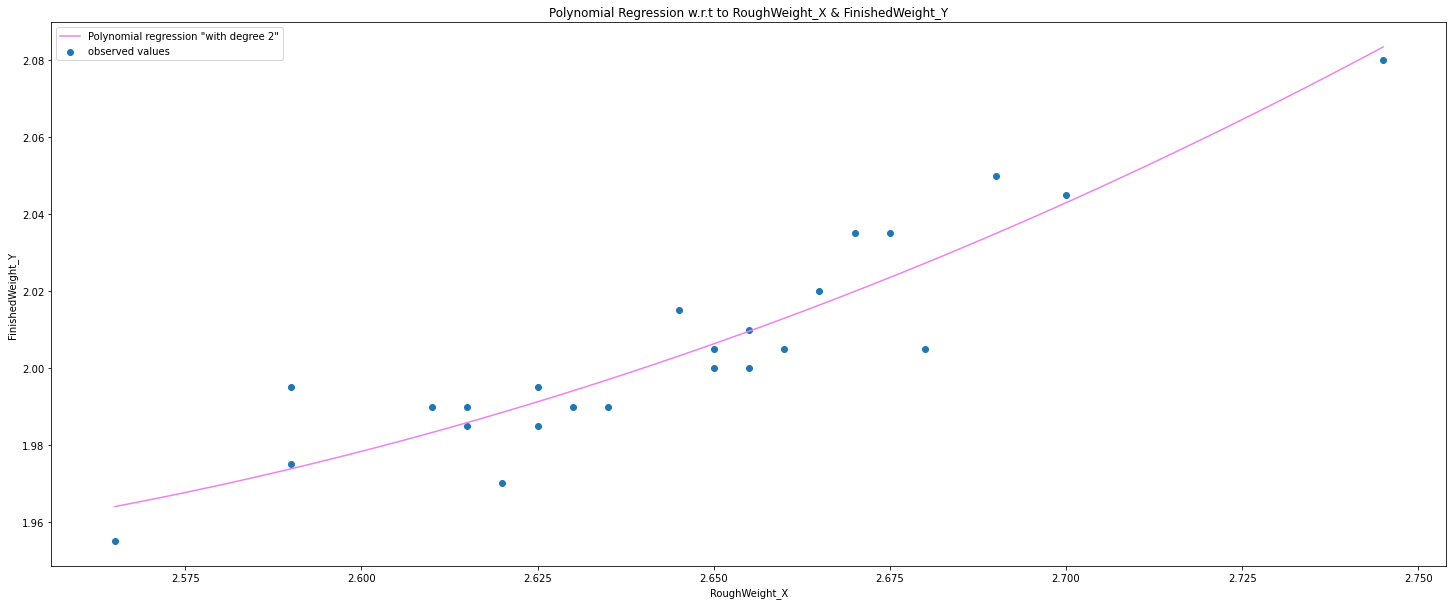

In [412]:
#Polynomial regression with degree 2
"""""
y = ax^2 + bx + c
As per the below plotted graph, 
x = X
y = Y
a = B2
b = B1
c = B0
"""""
plt.figure(figsize=(25,10))
plt.scatter(X,Y,label = 'observed values' )
plt.xlabel("RoughWeight_X")
plt.ylabel("FinishedWeight_Y")
plt.title('Polynomial Regression w.r.t to RoughWeight_X & FinishedWeight_Y')

x = np.linspace(min(X),max(X))
y = lambda x: x**2*B2 + x*B1 + B0 
plt.plot(x, y(x) , label = 'Polynomial regression "with degree 2"',c='violet')
plt.legend()
plt.show()


In [413]:
#Calculalting coeffiencts for exponential regression logB0, B1
"""""
==> y = a * e^(b*x) 
==> y = e^(logB0) * e^(B1*x)            (In terms of B0 & B1)
==> y = B0 * e^(B1*x)

a = exp(log (B0)) ==> a=B0
b = B1

"""""

df2 = pd.read_csv('DscLab_regression.csv')
X = df2.RoughWeight_X
Y = df2.FinishedWeight_Y
Y = np.log(Y)
N = len(df2)

x1 = x2 = y1 = x1y1 =  0

for i in range(0,N):
    x1 = X[i] + x1
    x2 = (X[i]**2) + x2
    y1 = (Y[i]) + y1
    x1y1 = (X[i]*(Y[i])) + x1y1


#Getting Coefficents via Cramers rule
A = np.array([[N,x1],[x1,x2]])
B = np.array([y1,x1y1])


#Solving in Cramer's rule
Ainv = np.linalg.inv(A) 
[logB0, B1 ] =  (np.dot(Ainv,B))

# Getting coefficents vis least square method
# [logB0, B1] =  np.linalg.lstsq(A,B)[0]

print('B1 value for  exponential-regression  is ' , B1)
print('logB0 value for  exponential-regression is ' , logB0)


B1 value for  exponential-regression  is  0.32196239263294046
logB0 value for  exponential-regression is  -0.155666738817672


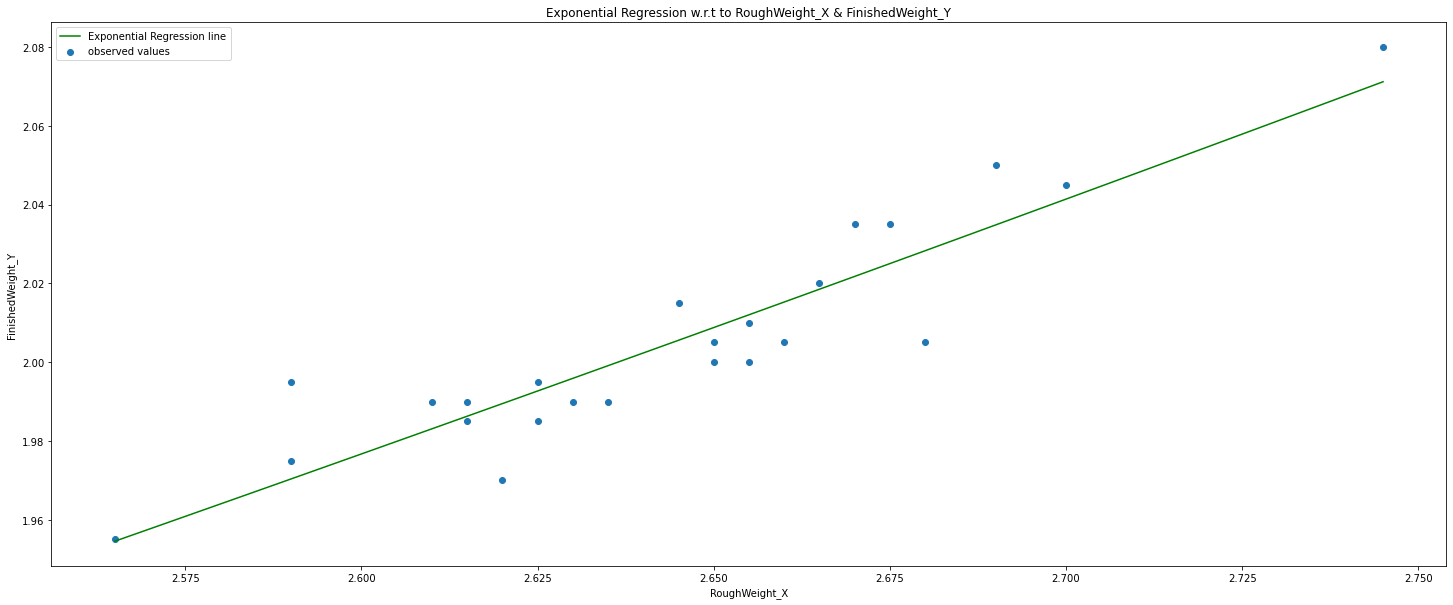

In [414]:
#Exponential regression  
"""""
==> y = a * e^(b*x) 
==> y = e^(logB0) * e^(B1*x)            (In terms of B0 & B1)
==> y = B0 * e^(B1*x)

As per the below plotted graph,
x = X
y = Y
a = exp(log (B0)) ==> a=B0
b = B1

"""""

X = df2.RoughWeight_X
Y = df2.FinishedWeight_Y
plt.figure(figsize=(25,10))
plt.scatter(X,Y,label = 'observed values' )
plt.xlabel("RoughWeight_X")
plt.ylabel("FinishedWeight_Y ")
y = np.exp(logB0) * np.exp(B1*x)
plt.title('Exponential Regression w.r.t to RoughWeight_X & FinishedWeight_Y')
x = np.linspace(min(X),max(X))
plt.plot(x,y , label = 'Exponential Regression line',c='green')
plt.legend()
plt.show()



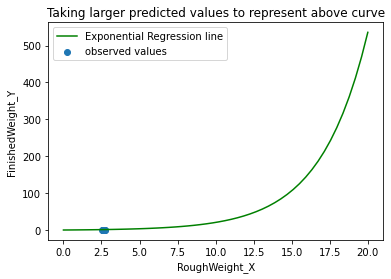

In [415]:
plt.figure()
plt.scatter(X,Y , label = 'observed values')
plt.xlabel("RoughWeight_X")
plt.ylabel("FinishedWeight_Y ")
plt.title('Taking larger predicted values to represent above curve')
x = np.linspace(0,20)
y1 = np.exp(logB0) * np.exp(B1*x)
plt.plot(x,y1 , label = 'Exponential Regression line',c='green')
plt.legend()
plt.show()